In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [2]:
data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多

In [3]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [ ]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain) #训练

In [ ]:
reg.predict(Xtest) #传统接口predict

In [ ]:
reg.score(Xtest,Ytest) #你能想出这里应该返回什么模型评估指标么？利用shift+Tab可以知道，R^2评估指标

In [ ]:
y.mean()

In [ ]:
MSE(Ytest,reg.predict(Xtest))#可以看出均方误差是平均值y.mean()的1/3左右，结果不算好也不算坏

In [ ]:
reg.feature_importances_ #树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法(SelectFromModel)进行特征选择
#xgboost可以使用嵌入法进行特征选择

In [ ]:
reg = XGBR(n_estimators=100) #交叉验证中导入的没有经过训练的模型

In [58]:
CVS(reg,Xtrain,Ytrain,cv=5).mean()
#这里应该返回什么模型评估指标，还记得么？ 返回的是与reg.score相同的评估指标R^2（回归），准确率（分类）

0.8017863029875325

In [56]:
#严谨的交叉验证与不严谨的交叉验证之间的讨论：训练集 or 全数据？

array([0.83340801, 0.77096033, 0.83473392, 0.80424149, 0.76558778])

In [ ]:
#严谨 vs 不严谨

In [57]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.041115480238048

In [59]:
#来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [60]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()#0.7975497480638329

0.7975497480638329

In [61]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()#-16.998723616338033

-16.998723616338033

In [62]:
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()#0.6835070597278085

0.6835070597278085

In [63]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()#-25.34950749364844

-25.34950749364844

In [74]:
#如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg = XGBR(n_estimators=10,silent=True)#xgboost库silent=True不会打印训练进程，只返回运行结果，默认是False会打印训练进程
#sklearn库中的xgbsoost的默认为silent=True不会打印训练进程，想打印需要手动设置为False
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()#-92.67865836936579

-92.67865836936579

In [82]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [83]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

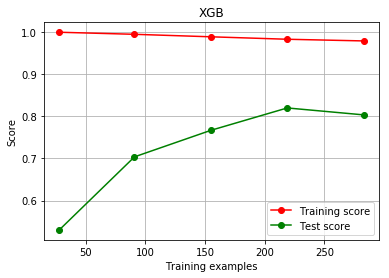

In [85]:
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                    ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

660 0.8046775284172915


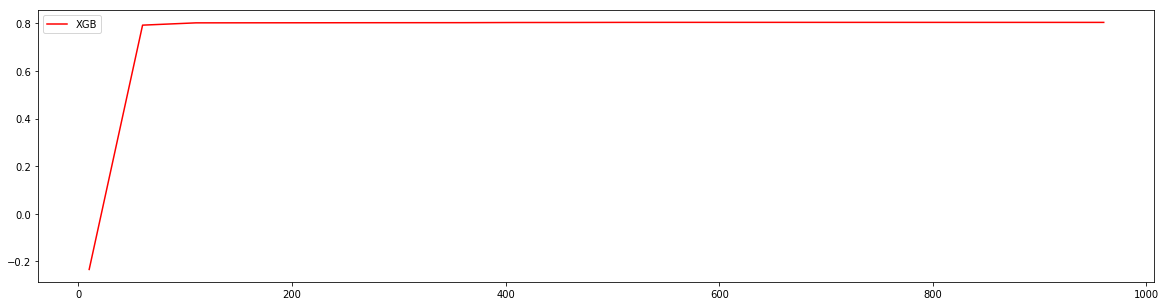

In [86]:
#=====【TIME WARNING：25 seconds】=====#

axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

In [ ]:
#选出来的n_estimators非常不寻常，我们是否要选择准确率最高的n_estimators值呢？

650 0.80476050359201 0.01053673846018678
50 0.7857724708830981 0.009072727885598212
150 0.8032842414878519 0.009747694343514357 0.04844478399052411


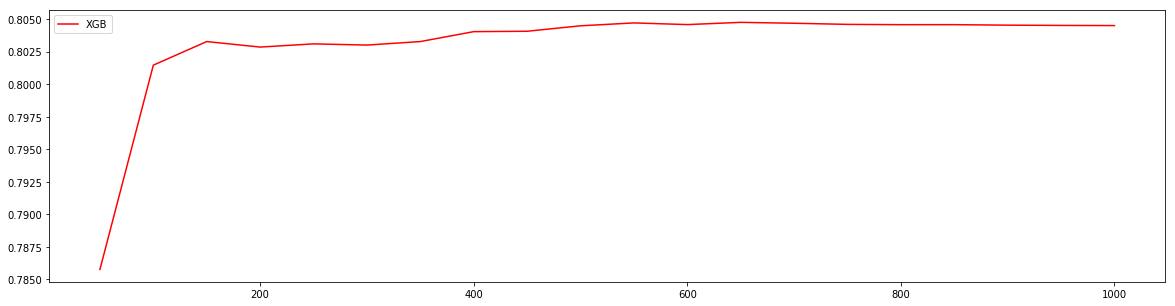

In [105]:
#======【TIME WARNING: 20s】=======#
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315 0.04805674671831314


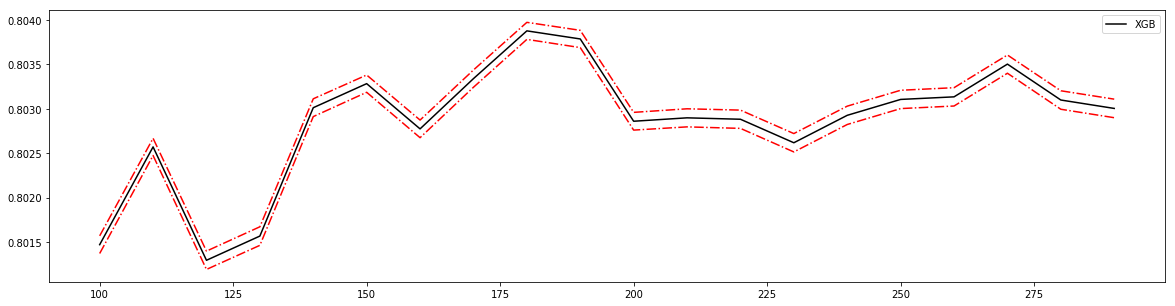

In [106]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

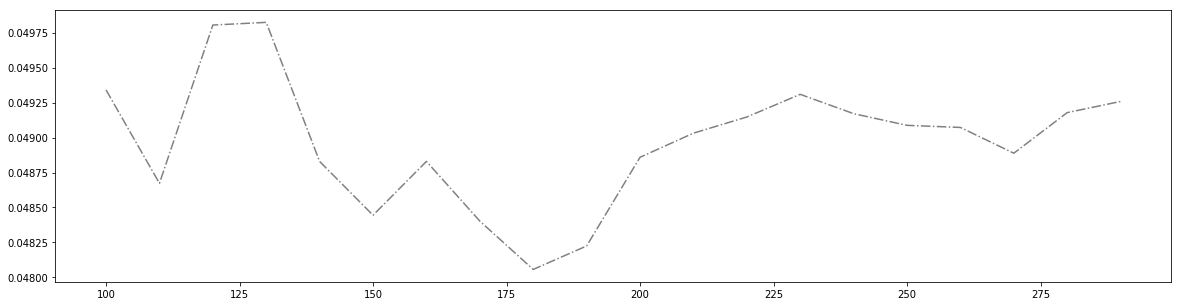

In [89]:
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [107]:
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9197580267581366
0.0787498950958252


In [108]:
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9208745746309475
0.36807847023010254


In [109]:
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9231068620728082
0.12366437911987305


0.7368421052631579 0.837609040251761


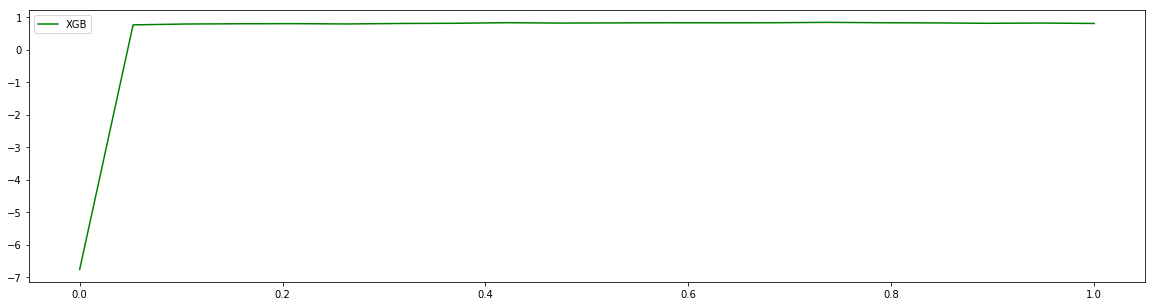

In [110]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.65 0.8302530801197368 0.008708816667924316
0.7999999999999999 0.8277414964661117 0.007159903723250457
0.7999999999999999 0.8277414964661117 0.007159903723250457 0.036832895762985055


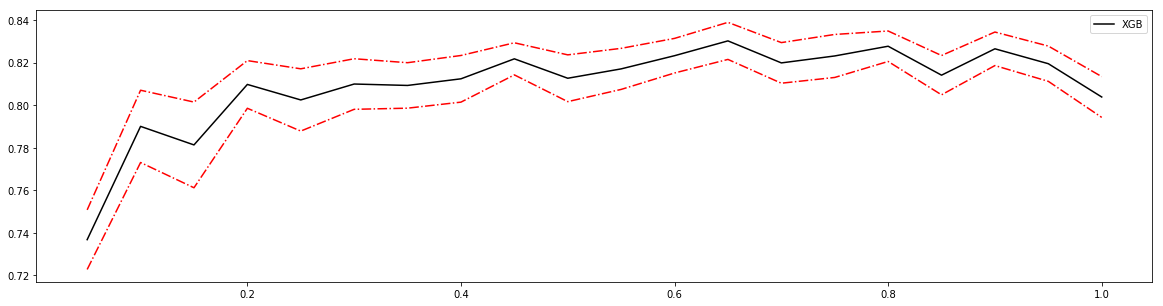

In [111]:
#继续细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093 0.033300928468131166


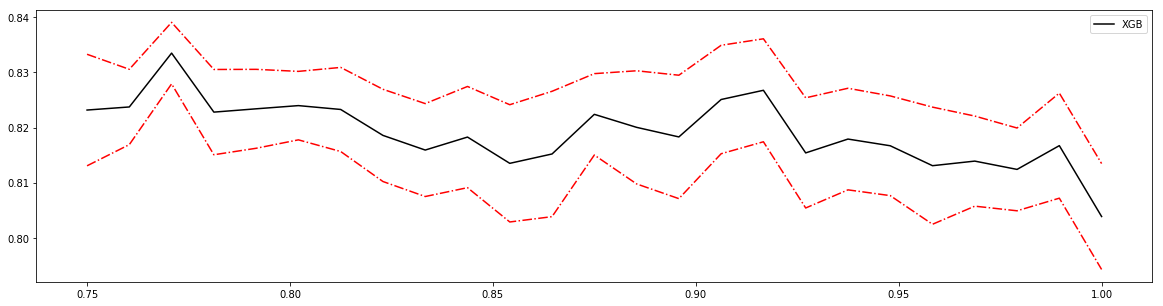

In [112]:
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [118]:
reg = XGBR(n_estimators=180
         #  ,subsample=0.7708333333333334
           ,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9159462982185405

In [116]:
MSE(Ytest,reg.predict(Xtest))

7.821523502888769

In [124]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [125]:
reg = XGBR(n_estimators=180,random_state=420)

In [126]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.80
neg_mean_squared_error:-13.48


[0.8038787848970184, -13.482301822063182]

In [127]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.8038787848970184, -13.482301822063182]

In [128]:
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:01:561781
	
learning_rate = 0.2
r2:0.81
neg_mean_squared_error:-13.32
00:01:848888
	
learning_rate = 0.5
r2:0.81
neg_mean_squared_error:-13.24
00:01:541875
	
learning_rate = 1
r2:0.72
neg_mean_squared_error:-19.11
00:01:499027
	


0.55 0.8125604372670463


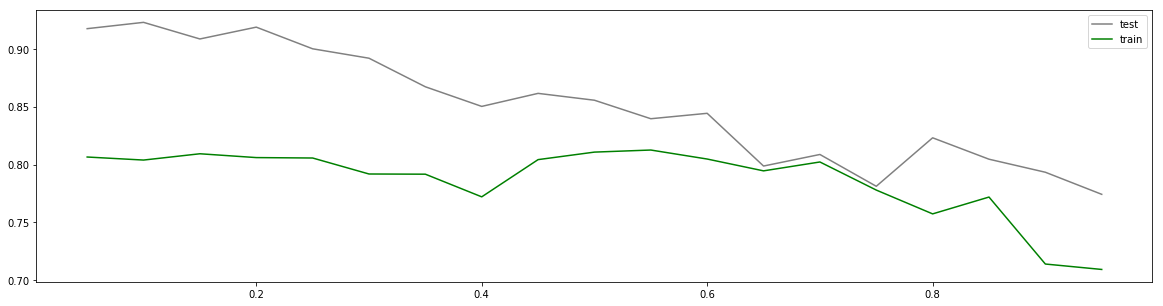

In [130]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

In [131]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180
               ,learning_rate=0.1
               ,random_state=420
               ,booster=booster).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.9231068620728082
gblinear
0.6286510307485139
dart
0.923106843149575


In [132]:
#默认reg:linear
reg = XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest, Ytest)

0.9231068620728082

In [133]:
MSE(Ytest,reg.predict(Xtest))

7.155205217161047

In [134]:
#xgb实现法
import xgboost as xgb

In [135]:
#使用类DMatrix读取数据
dtrain = xgb.DMatrix(Xtrain,Ytrain) #特征矩阵和标签都进行一个传入
dtest = xgb.DMatrix(Xtest,Ytest)

In [136]:
#非常遗憾无法打开来查看，所以通常都是先读到pandas里面查看之后再放到DMatrix中
dtrain

In [137]:
import pandas as pd

In [139]:
pd.DataFrame(Xtrain)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
1,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
2,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
3,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
4,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
5,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
6,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
7,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
8,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
9,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65


In [146]:
#写明参数
param = {'silent':True #默认为False，通常要手动把它关闭掉
         ,'objective':'reg:linear'
         ,"eta":0.1}
num_round = 180 #n_estimators

In [147]:
#类train，可以直接导入的参数是训练数据，树的数量，其他参数都需要通过params来导入
bst = xgb.train(param, dtrain, num_round)

In [148]:
#接口predict
preds = bst.predict(dtest)

In [149]:
preds

array([ 6.4613175, 22.123888 , 30.755163 , 13.424351 ,  8.378565 ,
       23.608477 , 14.2151165, 16.026499 , 15.498961 , 14.10649  ,
       24.030867 , 34.36362  , 21.461111 , 28.839497 , 19.568035 ,
       10.188658 , 19.42369  , 23.539951 , 22.850523 , 23.198708 ,
       17.82486  , 16.07219  , 27.602034 , 20.773046 , 20.868807 ,
       15.865789 , 22.076588 , 29.292158 , 22.841051 , 15.770392 ,
       36.680496 , 21.057947 , 20.137005 , 23.777853 , 22.70615  ,
       23.863268 , 15.595315 , 24.565872 , 17.720552 , 33.95111  ,
       18.784286 , 20.483374 , 37.10668  , 18.068268 , 12.73839  ,
       31.186407 , 45.895035 , 12.696718 , 10.773068 , 36.064293 ,
       26.262571 , 19.908836 , 20.715096 , 48.814903 , 27.550056 ,
       25.225826 , 17.15366  , 21.215551 , 17.426773 , 18.478971 ,
       14.6453705, 22.841473 , 18.869593 , 29.990978 , 29.933191 ,
       18.756853 , 18.784918 , 16.33361  , 23.155968 , 19.144344 ,
       29.724382 , 42.121906 , 31.544363 , 23.017508 , 19.5360

In [150]:
from sklearn.metrics import r2_score
r2_score(Ytest,preds)

0.9260984298390122

In [151]:
MSE(Ytest,preds)

6.87682821415069

In [183]:
import xgboost as xgb

#为了便捷，使用全数据
dfull = xgb.DMatrix(X,y)

In [191]:
#设定参数
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
num_round = 100
n_fold=5 #sklearn - KFold

In [192]:
#使用类xgb.cv
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:610364


In [193]:
#看看类xgb.cv生成了什么结果？
cvresult1 #随着树不断增加，我们的模型的效果如何变化

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584296
1,12.337973,0.097557,12.519736,0.473458
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
5,3.781454,0.029604,5.045190,0.687971
6,2.947767,0.038786,4.472030,0.686492
7,2.357748,0.042040,4.179314,0.737935
8,1.951907,0.044972,3.979878,0.798198
9,1.660895,0.044894,3.870751,0.812331


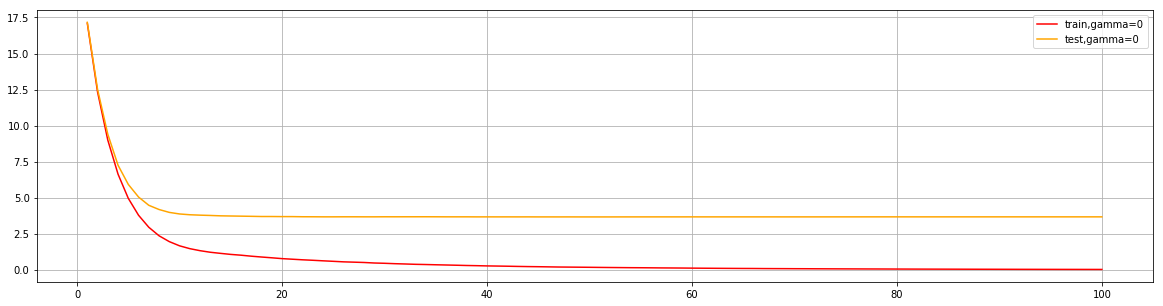

In [195]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

#从这个图中，我们可以看出什么？
#怎样从图中观察模型的泛化能力？
#从这个图的角度来说，模型的调参目标是什么？

In [ ]:
#xgboost中回归模型的默认模型评估指标是什么？

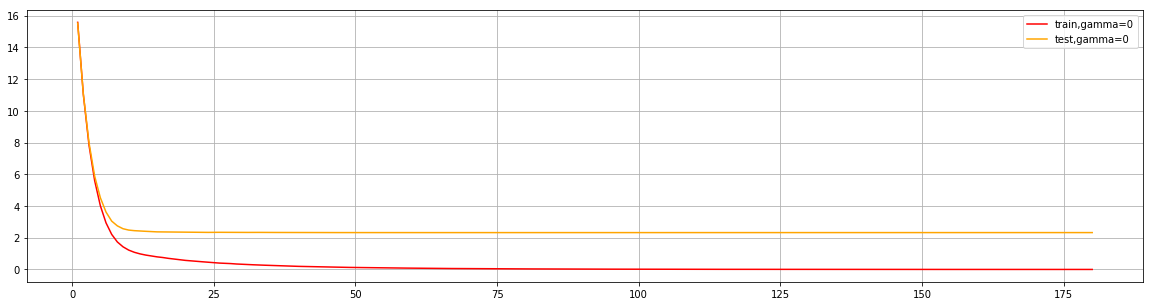

In [190]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0,"eval_metric":"mae"}
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

In [196]:
param1 = {'silent':True,'obj':'reg:linear',"gamma":0}
param2 = {'silent':True,'obj':'reg:linear',"gamma":20}
num_round = 180
n_fold=5

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:083104


In [197]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:01:359378


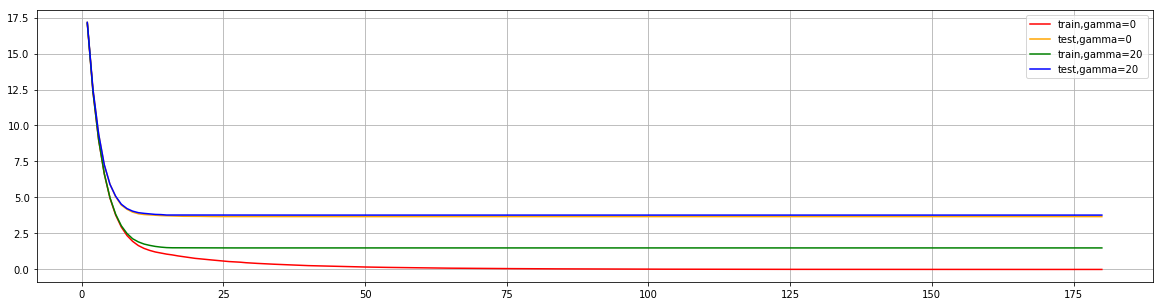

In [198]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

#从这里，你看出gamma是如何控制过拟合了吗？控制训练集上的训练 - 降低训练集上的表现

In [28]:
import xgboost as xgb
import matplotlib.pyplot as plt
from time import time
import datetime

In [29]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

x2 = data2.data
y2 = data2.target

dfull2 = xgb.DMatrix(x2,y2)

param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,"nfold":5
          ,"eval_metrics":"error"
         }
param2 = {'silent':True,'obj':'binary:logistic',"gamma":1,"nfold":5}
num_round = 100

In [30]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:271581


In [31]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round,metrics=("error")) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

00:00:443810


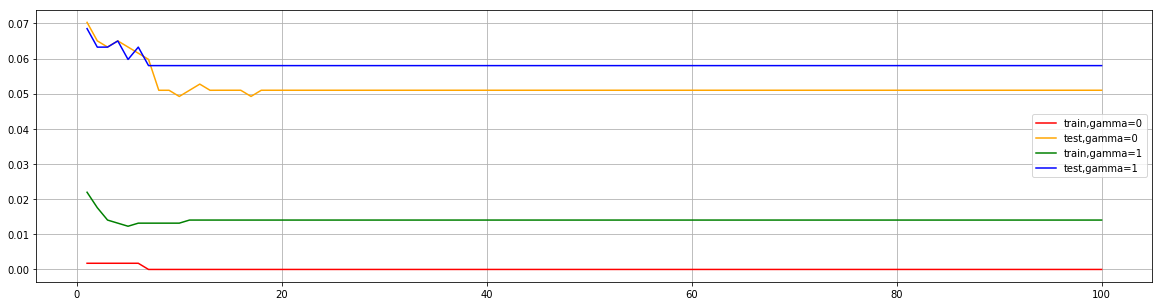

In [32]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=1")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=1")
plt.legend()
plt.show()

In [217]:
dfull = xgb.DMatrix(X,y)

param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

00:00:513584


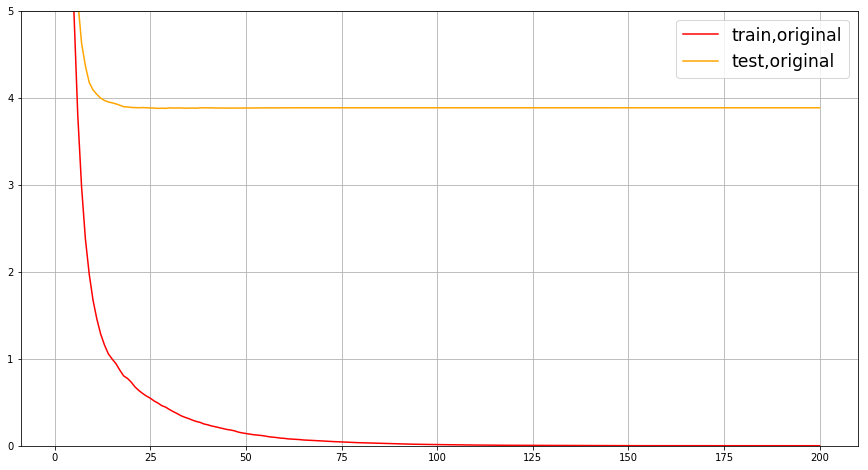

In [222]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:00:532621
00:00:223373
00:00:259346


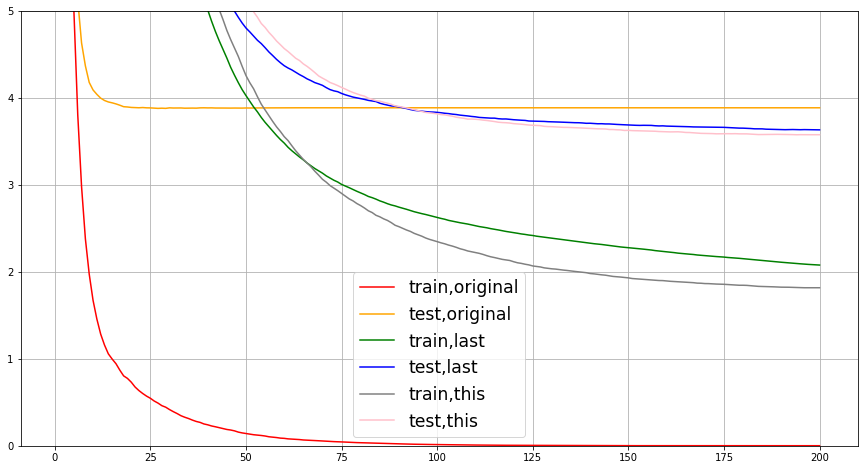

In [258]:
param1 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"max_depth":6
          ,"eta":0.3
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")

param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,"gamma":0
          ,"lambda":1
          ,"alpha":0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.4
          ,"colsample_bynode":1
          ,"nfold":5}

param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1
          ,"nfold":5}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

In [259]:
import pickle

In [21]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)

#设定参数，对模型进行训练
param = {'silent':True
          ,'obj':'reg:linear'
          ,"subsample":1
          ,"eta":0.05
          ,"gamma":20
          ,"lambda":3.5
          ,"alpha":0.2
          ,"max_depth":4
          ,"colsample_bytree":0.4
          ,"colsample_bylevel":0.6
          ,"colsample_bynode":1}
num_round = 180

bst = xgb.train(param, dtrain, num_round)

In [22]:
#保存模型
pickle.dump(bst, open("xgboostonboston.dat","wb"))

#注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件 - txt
#当我们希望导入的不是文本文件，而是模型本身的时候，我们使用"wb"和"rb"作为读取的模式
#其中wb表示以二进制写入，rb表示以二进制读入，使用open进行保存的这个文件中是一个可以进行读取或者调用的模型

In [23]:
#看看模型被保存到了哪里？
import sys
sys.path

['C:\\Pythonwork\\micro-class\\11 xgboost',
 'C:\\Python\\python37.zip',
 'C:\\Python\\DLLs',
 'C:\\Python\\lib',
 'C:\\Python',
 '',
 'C:\\Python\\lib\\site-packages',
 'C:\\Python\\lib\\site-packages\\win32',
 'C:\\Python\\lib\\site-packages\\win32\\lib',
 'C:\\Python\\lib\\site-packages\\Pythonwin',
 'C:\\Python\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Shuyu\\.ipython']

In [24]:
#重新打开jupyter lab

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

data = load_boston()

X = data.data
y = data.target

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [25]:
#注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest,Ytest)

In [26]:
#导入模型
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat")

Loaded model from: xgboostonboston.dat


In [27]:
#做预测，直接调用接口predict
ypreds = loaded_model.predict(dtest)

In [28]:
ypreds

array([ 9.244746, 22.536953, 28.47614 , 13.126131,  9.944413, 21.356094,
       15.187935, 15.559099, 15.629611, 15.555439, 21.427156, 35.502792,
       20.827318, 29.397932, 21.669186, 11.906522, 21.464252, 26.143337,
       26.300356, 23.474188, 18.186035, 15.851086, 22.928507, 22.919674,
       20.557487, 16.27315 , 22.000988, 25.230766, 23.12165 , 16.663473,
       34.747093, 20.003593, 20.617601, 23.74025 , 23.044952, 24.849056,
       15.414761, 23.383522, 18.500463, 33.790466, 18.009186, 18.729418,
       33.181175, 18.834534, 15.085677, 27.601177, 42.75243 , 15.359873,
       10.37829 , 37.5367  , 27.097404, 20.73775 , 20.198935, 46.20087 ,
       26.959623, 24.566458, 18.678255, 20.913795, 17.369501, 17.823708,
       15.136806, 24.533068, 19.465569, 30.474009, 29.571526, 19.773672,
       21.554045, 17.590807, 22.250225, 18.275839, 29.012346, 40.198055,
       30.235825, 23.174484, 20.191778, 23.742437, 38.217915, 27.173447,
       21.068003, 20.5974  , 18.412853, 45.326836, 

In [31]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest,ypreds)

9.107608696116197

In [32]:
r2_score(Ytest,ypreds)

0.9021254331073938

In [33]:
bst = xgb.train(param, dtrain, num_round)

In [34]:
import joblib

#同样可以看看模型被保存到了哪里
joblib.dump(bst,"xgboost-boston.dat")

['xgboost-boston.dat']

In [35]:
loaded_model = joblib.load("xgboost-boston.dat")

In [36]:
dtest = xgb.DMatrix(Xtest,Ytest)
ypreds = loaded_model.predict(dtest)

In [37]:
ypreds

array([ 9.244746, 22.536953, 28.47614 , 13.126131,  9.944413, 21.356094,
       15.187935, 15.559099, 15.629611, 15.555439, 21.427156, 35.502792,
       20.827318, 29.397932, 21.669186, 11.906522, 21.464252, 26.143337,
       26.300356, 23.474188, 18.186035, 15.851086, 22.928507, 22.919674,
       20.557487, 16.27315 , 22.000988, 25.230766, 23.12165 , 16.663473,
       34.747093, 20.003593, 20.617601, 23.74025 , 23.044952, 24.849056,
       15.414761, 23.383522, 18.500463, 33.790466, 18.009186, 18.729418,
       33.181175, 18.834534, 15.085677, 27.601177, 42.75243 , 15.359873,
       10.37829 , 37.5367  , 27.097404, 20.73775 , 20.198935, 46.20087 ,
       26.959623, 24.566458, 18.678255, 20.913795, 17.369501, 17.823708,
       15.136806, 24.533068, 19.465569, 30.474009, 29.571526, 19.773672,
       21.554045, 17.590807, 22.250225, 18.275839, 29.012346, 40.198055,
       30.235825, 23.174484, 20.191778, 23.742437, 38.217915, 27.173447,
       21.068003, 20.5974  , 18.412853, 45.326836, 

In [38]:
MSE(Ytest, ypreds)

9.107608696116197

In [39]:
r2_score(Ytest,ypreds)

0.9021254331073938

In [40]:
#使用sklearn中的模型
from xgboost import XGBRegressor as XGBR

bst = XGBR(n_estimators=200
           ,eta=0.05,gamma=20
           ,reg_lambda=3.5
           ,reg_alpha=0.2
           ,max_depth=4
           ,colsample_bytree=0.4
           ,colsample_bylevel=0.6).fit(Xtrain,Ytrain) #训练完毕

In [41]:
joblib.dump(bst,"xgboost-boston-sklearn.dat")

['xgboost-boston-sklearn.dat']

In [42]:
loaded_model = joblib.load("xgboost-boston-sklearn.dat")

In [43]:
#则这里可以直接导入Xtest,直接是我们的numpy
ypreds = loaded_model.predict(Xtest)

In [44]:
Xtest

array([[4.15292e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.29460e+02, 2.73800e+01],
       [2.73100e-02, 0.00000e+00, 7.07000e+00, ..., 1.78000e+01,
        3.96900e+02, 9.14000e+00],
       [3.15000e-02, 9.50000e+01, 1.47000e+00, ..., 1.70000e+01,
        3.96900e+02, 4.56000e+00],
       ...,
       [5.08300e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.89710e+02, 5.68000e+00],
       [3.77498e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.20100e+01, 1.71500e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01]])

In [45]:
dtest

In [46]:
ypreds

array([ 9.350334 , 21.501623 , 30.219057 , 13.021226 ,  9.883689 ,
       20.977922 , 16.023008 , 15.8910475, 15.512305 , 15.706607 ,
       22.096102 , 35.381573 , 20.3307   , 27.129421 , 19.997156 ,
       10.935587 , 20.25071  , 26.188572 , 26.711943 , 22.600443 ,
       18.23832  , 15.876045 , 26.263977 , 22.706024 , 20.18491  ,
       15.891692 , 21.4781   , 29.047956 , 23.371012 , 17.167185 ,
       35.699898 , 20.490337 , 20.195292 , 23.81444  , 23.106022 ,
       25.709312 , 15.0182905, 22.621248 , 18.576109 , 34.25664  ,
       17.46115  , 19.159126 , 34.79234  , 17.766731 , 17.141891 ,
       27.755646 , 39.786766 , 22.49913  , 10.246634 , 36.76105  ,
       26.294876 , 20.75917  , 19.893272 , 46.62629  , 26.549704 ,
       24.040398 , 17.769514 , 20.76889  , 16.139618 , 17.494894 ,
       16.005596 , 24.28487  , 19.15237  , 31.407684 , 27.862312 ,
       18.877817 , 20.50497  , 16.094156 , 22.622025 , 17.762297 ,
       28.518019 , 41.146317 , 32.52681  , 23.117966 , 19.1251

In [47]:
MSE(Ytest, ypreds)

10.198269690947479

In [48]:
r2_score(Ytest,ypreds)

0.8904046866351292

In [16]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs #自创数据集
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [17]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [18]:
X.shape

(550, 2)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
(y == 1).sum() / y.shape[0] #9%

0.09090909090909091

In [15]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [43]:
#在sklearn下建模#

clf = XGBC().fit(Xtrain,Ytrain)
ypred = clf.predict(Xtest)

In [44]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [45]:
clf.score(Xtest,Ytest) #默认模型评估指标 - 准确率

0.9272727272727272

In [46]:
cm(Ytest,ypred,labels=[1,0]) #少数类写在前面

array([[  9,   4],
       [  8, 144]], dtype=int64)

In [47]:
recall(Ytest,ypred)

0.6923076923076923

In [48]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])

0.9671052631578947

In [49]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

cm(Ytest,ypred_,labels=[1,0])

recall(Ytest,ypred_)

auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9696356275303644

In [50]:
#随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9671052631578947
5
	Accuracy:0.9454545454545454
	Recall:0.9230769230769231
	AUC:0.9665991902834008
10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9696356275303644
20
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9706477732793523
30
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9701417004048584


In [51]:
#负/正样本比例
clf_ = XGBC(scale_pos_weight=20).fit(Xtrain,Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest,Ytest)

0.9515151515151515

In [52]:
cm(Ytest,ypred_,labels=[1,0])

array([[ 13,   0],
       [  8, 144]], dtype=int64)

In [53]:
recall(Ytest,ypred_)

1.0

In [54]:
auc(Ytest,clf_.predict_proba(Xtest)[:,1])

0.9706477732793523

In [20]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [46]:
#看看xgboost库自带的predict接口
param = {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100

In [47]:
bst = xgb.train(param, dtrain, num_round)

In [48]:
preds = bst.predict(dtest)

In [49]:
#看看preds返回了什么？
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [25]:
#自己设定阈值
ypred = preds.copy()

In [28]:
ypred[preds > 0.5] = 1

In [31]:
ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [30]:
ypred[ypred != 1] = 0

In [32]:
#写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
         ,"negative vs positive: 5"
         ,"negative vs positive: 10"]

In [34]:
[*zip(names,scale_pos_weight)]

[('negative vs positive: 1', 1),
 ('negative vs positive: 5', 5),
 ('negative vs positive: 10', 10)]

In [35]:
#导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

for name,i in zip(names,scale_pos_weight):
    param = {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":i}
    num_round = 100
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008


In [36]:
#当然我们也可以尝试不同的阈值
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param= {'silent':True,'objective':'binary:logistic'
                ,"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
        print("\tRecall:{}".format(recall(Ytest,ypred)))
        print("\tAUC:{}".format(auc(Ytest,preds)))

negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.7
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.9
	Accuracy:0.9515151515151515
	Recall:0.5384615384615384
	AUC:0.9741902834008097
negative vs positive: 5,thresholds:0.3
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.7
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.9
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9635627530364372
negative vs positive: 10,thresholds:0.3
	Accuracy:0.95151515151